# Demo: Overfitting, Weight-Regularization

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc_context({'axes.edgecolor':'white', 'xtick.color':'white', 'axes.labelcolor':'white', 'ytick.color':'white'});

### Plot polynomial

Here we plot the polynomial curve $f(x) = 5x^3 + x^2 - 2x - 0.5$.

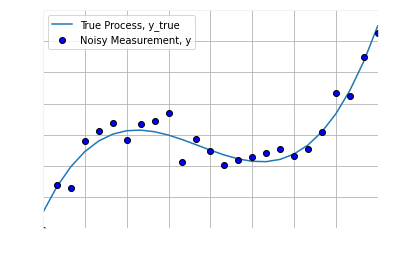

In [2]:
nsamp = 25 # number of samples taken
p = np.array([5, 1, -2, -.5]) # true coefficients
var = 0.1 # noise variance

# we'll take a set of measurements uniformly
x = np.linspace(-1,1,nsamp)
y_true = np.polyval(p, x)
# noisy measurement, ym. use sqrt(var) as numpy normal standard deviation
y = y_true + np.random.normal(0, np.sqrt(var), nsamp)

plt.plot(x,y_true)
# we can force a scatter plot in plt.plot by making the third argument 'o'
plt.plot(x,y,'ob',markeredgecolor='black');
plt.grid();
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-1,1])
plt.ylim([-3,4])
plt.legend(['True Process, y_true','Noisy Measurement, y']);

In [3]:
# train test validation split
ntrain = 15
nval = 5
ntest = 5

inds = np.random.permutation(nsamp)

train_choices = inds[:ntrain]
val_choices = inds[ntrain:ntrain+nval]
test_choices = inds[ntrain+nval:]

xtrain, ytrain = x[train_choices], y[train_choices]
xval, yval     = x[val_choices], y[val_choices]
xtest, ytest   = x[test_choices], y[test_choices]

### Design Matrix

We have the design matrix as $D = \begin{bmatrix}
1 & x_1 & x_1^2 & x_1^3 & \cdots & x_1^{M}\\
1 & x_2 & x_2^2 & x_2^3 & \cdots & x_2^{M}\\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots\\ 
1 & x_n & x_n^2 & x_n^3 & \cdots & x_n^{M}
\end{bmatrix}$

- Complete the design matrix and set M = 25, the shape of the design matrix should be (15, 26)

In [4]:
# forming the design matrix
# features x, model order M

def design_matrix(x, M):
    # TODO
    x = x.reshape(-1, 1)
    PhiX = np.power(x, np.arange(M + 1))
    return PhiX


M = 25
Xtrain = design_matrix(xtrain, M)
print(Xtrain.shape)

(15, 26)


## Exercise 1: Ridge regression

Train MSE: 0.08740744984672193
Validation MSE: 0.21204480614954577


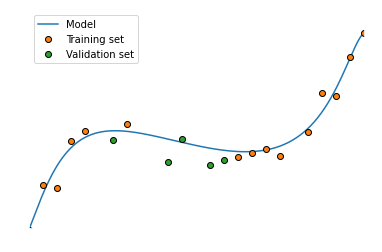

weights = 
[[ 0.  ]
 [-1.14]
 [ 0.89]
 [ 2.08]
 [ 0.14]
 [ 1.68]
 [-0.15]
 [ 0.95]
 [-0.17]
 [ 0.4 ]
 [-0.1 ]
 [ 0.07]
 [-0.02]
 [-0.11]
 [ 0.03]
 [-0.19]
 [ 0.04]
 [-0.2 ]
 [ 0.02]
 [-0.17]
 [-0.02]
 [-0.13]
 [-0.07]
 [-0.07]
 [-0.13]
 [-0.01]]


In [49]:
from sklearn import linear_model

# regr = linear_model.LinearRegression()
regr = linear_model.Ridge(alpha=0.05, fit_intercept=True)

regr.fit(Xtrain, ytrain)

# print the training error MSE
yhat_train = regr.predict(Xtrain)
MSE_train = np.mean((yhat_train - ytrain)**2)
print(f"Train MSE: {MSE_train}")

# print the validation error MSE
yhat_val = regr.predict(design_matrix(xval, M))
MSE_val = np.mean((yhat_val - yval)**2)
print(f"Validation MSE: {MSE_val}")

# plotting
x_line = np.linspace(-1,1,500).reshape(-1,1)
X_line = design_matrix(x_line, M)
y_line = regr.predict(X_line)

plt.figure()
plt.plot(x_line, y_line)
plt.plot(xtrain, ytrain,'o',markeredgecolor='black')
plt.plot(xval, yval,'o',markeredgecolor='black')
plt.xlim([-1,1])
plt.ylim([-3,4])
plt.legend(['Model','Training set', 'Validation set'])
plt.show()

w = regr.coef_

print("weights = ")
with np.printoptions(precision=2, suppress=True):
    print(w.reshape(-1,1))

## Exercise 2: Find the best alpha for the Ridge regressor based on the MSE of the validation set

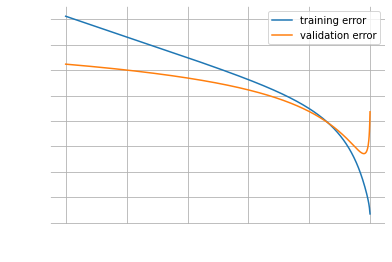

The best alpha is 0.21


In [50]:
training_error = []
validation_error = []
alpha_range = np.arange(10, 0, -0.01)

for a in alpha_range:
    
    regr = linear_model.Ridge(alpha=a, fit_intercept=True)
    regr.fit(Xtrain, ytrain)

    # calculate the training error MSE
    yhat_train = regr.predict(Xtrain)
    MSE_train = np.mean((yhat_train - ytrain)**2)
    training_error.append(MSE_train)

    # calculate the validation error MSE
    yhat_val = regr.predict(design_matrix(xval, M))
    MSE_val = np.mean((yhat_val - yval)**2)
    validation_error.append(MSE_val)


plt.plot(training_error, label='training error')
plt.plot(validation_error, label='validation error')
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.grid()
plt.show()

index_of_best_alpha = np.argmin(validation_error)
best_alpha = alpha_range[index_of_best_alpha]
print(f"The best alpha is {best_alpha:.2f}")

## Exercise 3: Lasso regularization

- Lasso: L1 norm regularizer $\displaystyle\frac{1}{2n_\mathrm{samples}}\|y - Xw\|^2_2 + \alpha\|w\|_1$


Train MSE: 0.21186517993759224
Validation MSE: 0.33256133392836845


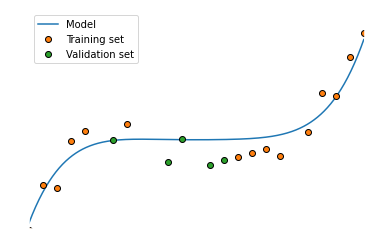

weights = 
[[ 0.  ]
 [-0.  ]
 [ 0.27]
 [ 0.  ]
 [ 0.  ]
 [ 2.95]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]
 [ 0.  ]]


In [54]:
from sklearn import linear_model

# regr = linear_model.LinearRegression()
regr = linear_model.Lasso(alpha=0.05, fit_intercept=True)

regr.fit(Xtrain, ytrain)

# print the training error MSE
yhat_train = regr.predict(Xtrain)
MSE_train = np.mean((yhat_train - ytrain)**2)
print(f"Train MSE: {MSE_train}")

# print the validation error MSE
yhat_val = regr.predict(design_matrix(xval, M))
MSE_val = np.mean((yhat_val - yval)**2)
print(f"Validation MSE: {MSE_val}")

# plotting
x_line = np.linspace(-1,1,500).reshape(-1,1)
X_line = design_matrix(x_line, M)
y_line = regr.predict(X_line)

plt.figure()
plt.plot(x_line, y_line)
plt.plot(xtrain, ytrain,'o',markeredgecolor='black')
plt.plot(xval, yval,'o',markeredgecolor='black')
plt.xlim([-1,1])
plt.ylim([-3,4])
plt.legend(['Model','Training set', 'Validation set'])
plt.show()

w = regr.coef_

print("weights = ")
with np.printoptions(precision=2, suppress=True):
    print(w.reshape(-1,1))